### EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


In [2]:
# reading the dataset
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
### Check Missing Data and handle it appropriately

In [4]:

missing_data_percent = (data.isnull().sum() / data.shape[0]*100).sort_values(ascending = False)
missing_data_percent.head(15)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
dtype: float64

# Drop the  Columns with high missing values 

In [5]:


data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [6]:
data[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


### Treat the  missing values 

In [7]:
data['LotFrontage']= data.LotFrontage.fillna(data.LotFrontage.median()) 
data['MasVnrArea']= data.MasVnrArea.fillna(data.MasVnrArea.median())
data['GarageYrBlt']= data.GarageYrBlt.fillna(data.GarageYrBlt.mean())  


/var/folders/yp/2bvpz_ss7dj1ly05fr2gknxh0000gn/T/ipykernel_1496/2789875089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LotFrontage'])
/var/folders/yp/2bvpz_ss7dj1ly05fr2gknxh0000gn/T/ipykernel_1496/2789875089.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MasVnrArea'])
/

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

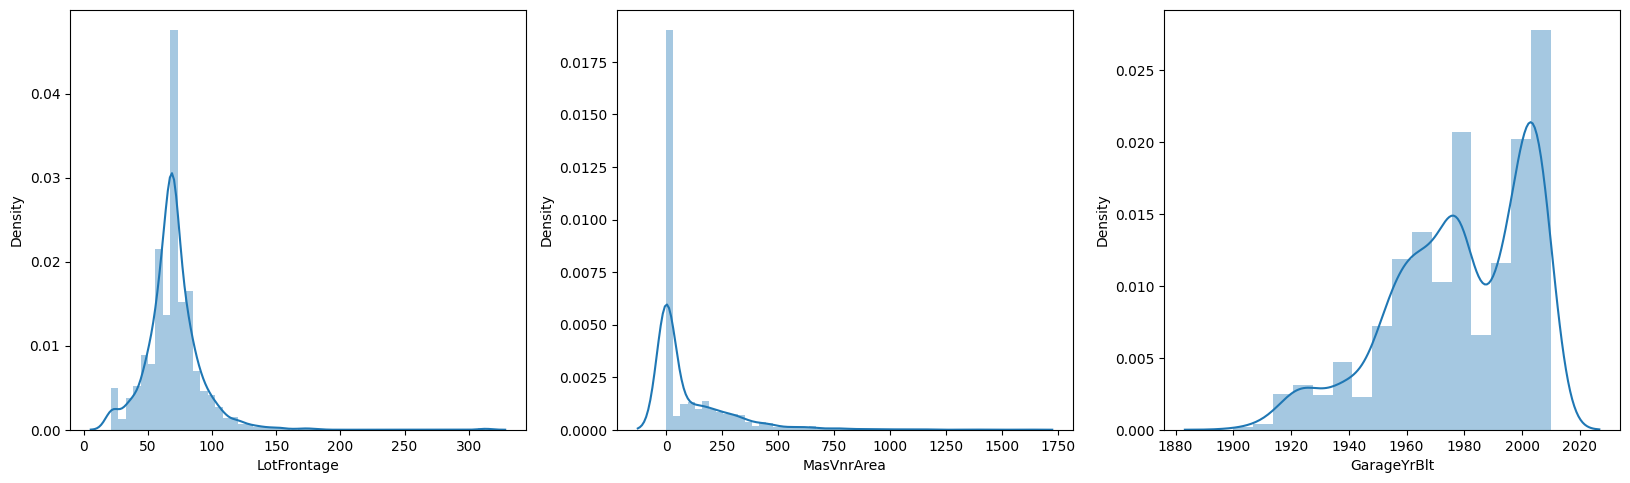

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(data['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(data['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(data['GarageYrBlt'])

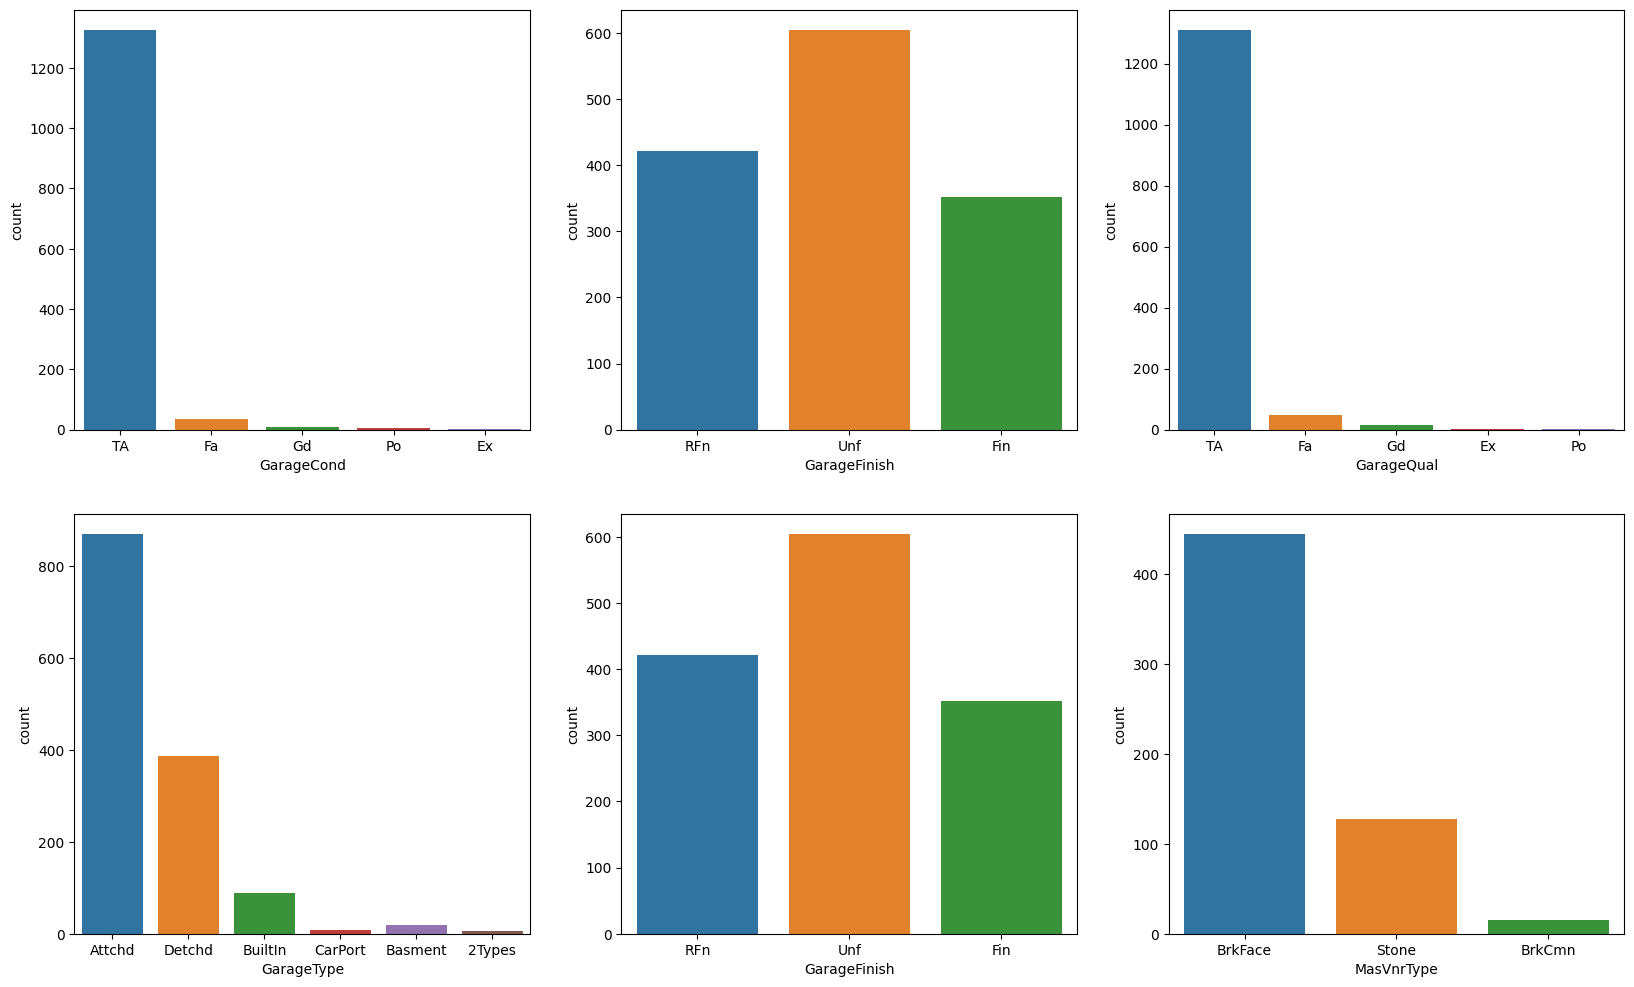

In [9]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = data)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = data)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = data)
plt.show()

In [10]:
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None') 
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr') 


In [11]:

data['MSSubClass']=data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

data['OverallQual']=data['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
data['OverallCond']=data['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


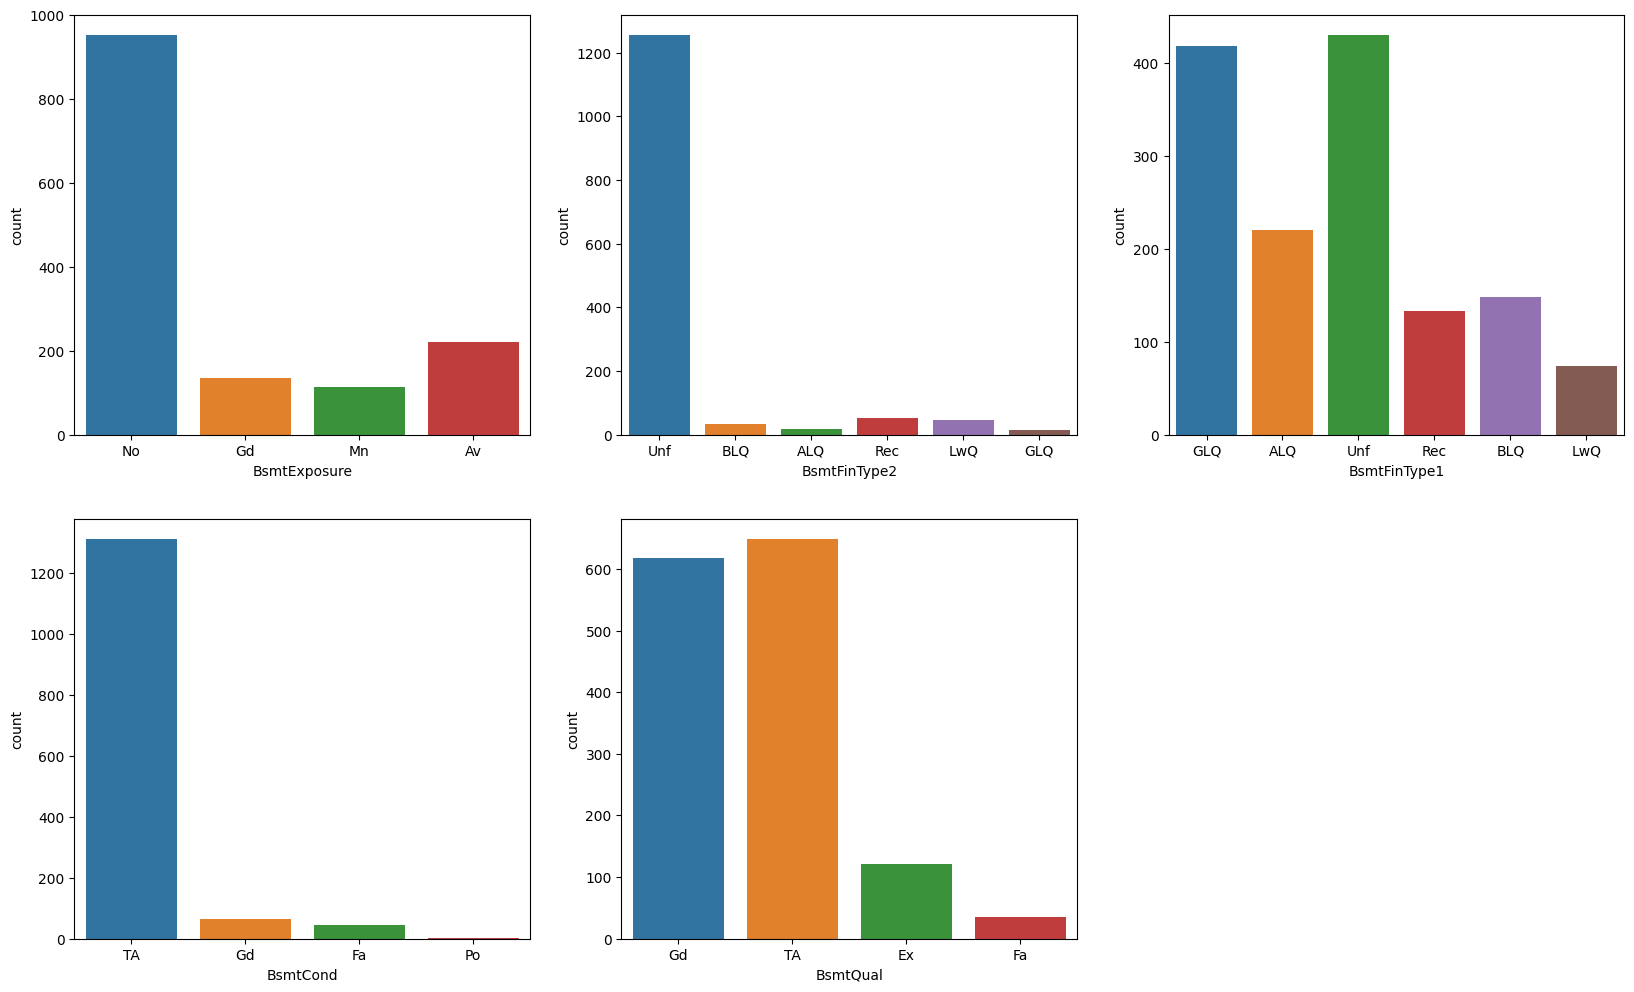

In [13]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = data)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = data)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = data)

plt.show()

In [14]:
# Cases when the house doesn't have the basement so replacing null with No Basement

data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')





In [15]:

missing_data = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
missing_data.head(10)


Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [16]:
### Assumptions of Linear Regression


data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/var/folders/yp/2bvpz_ss7dj1ly05fr2gknxh0000gn/T/ipykernel_1496/1726351049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice']) #it's skewed


<Axes: xlabel='SalePrice', ylabel='Density'>

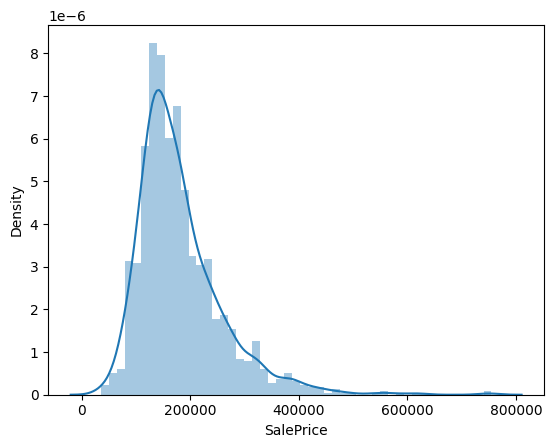

In [17]:
sns.distplot(data['SalePrice']) #it's skewed 

In [18]:

print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 1.882876


In [19]:
data['SalePrice']=np.log(data.SalePrice) #tranforming to form normal disribution


In [20]:
data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

/var/folders/yp/2bvpz_ss7dj1ly05fr2gknxh0000gn/T/ipykernel_1496/4096338724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

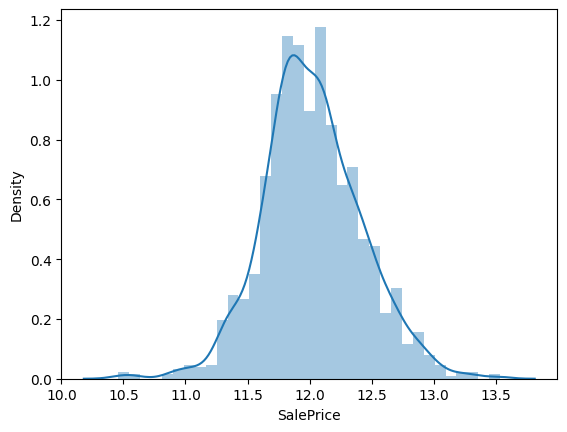

In [21]:
sns.distplot(data['SalePrice']) 

In [22]:
#skewness 
print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 0.121335


In [23]:
Cat = data.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Visualizing the columns

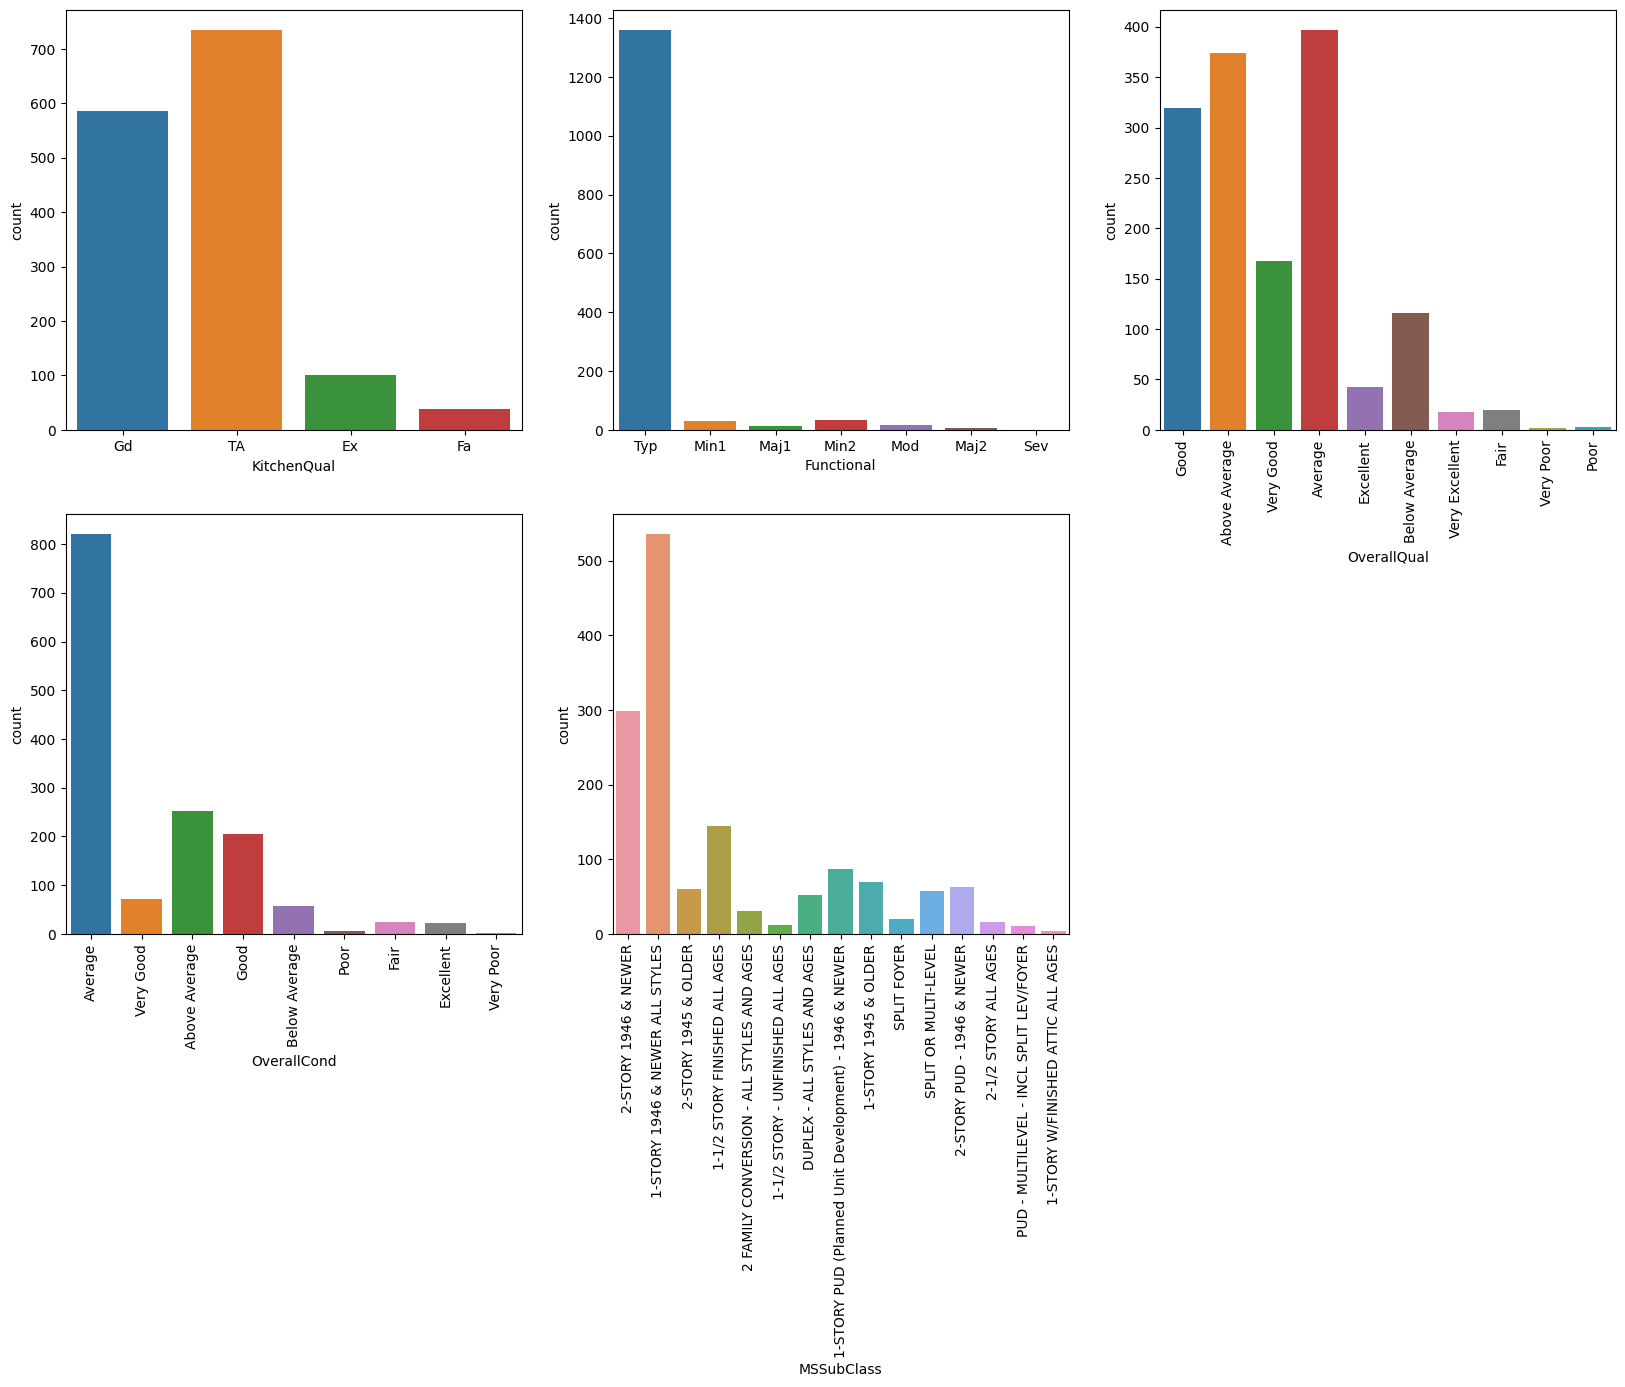

In [24]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = data)
plt.xticks(rotation=90)


plt.show()

In [25]:
data['MSSubClass'].value_counts() 

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

In [26]:




# Dropping column with high skew
data.drop(['Functional'],axis=1,inplace=True)


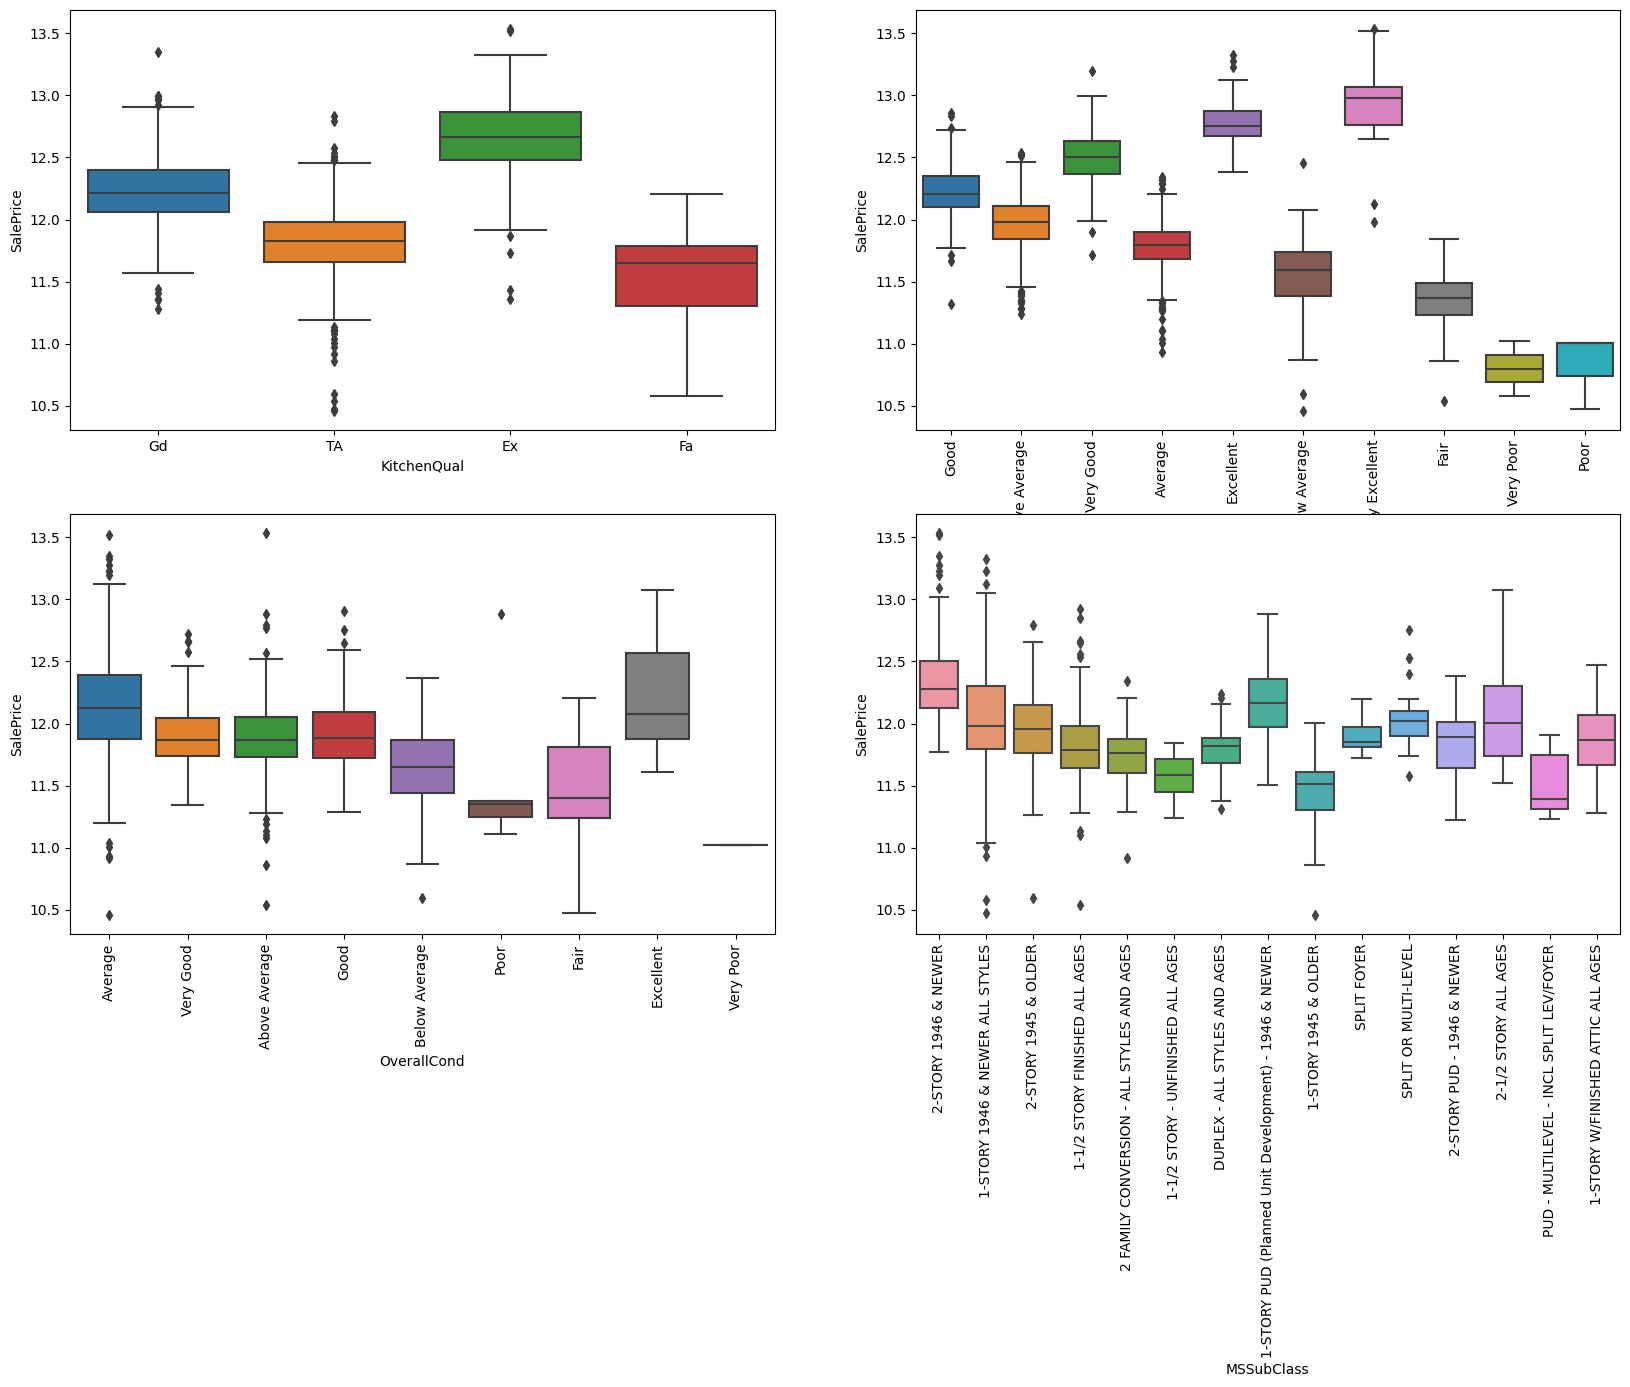

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = data)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = data)
plt.xticks(rotation=90)

plt.show()

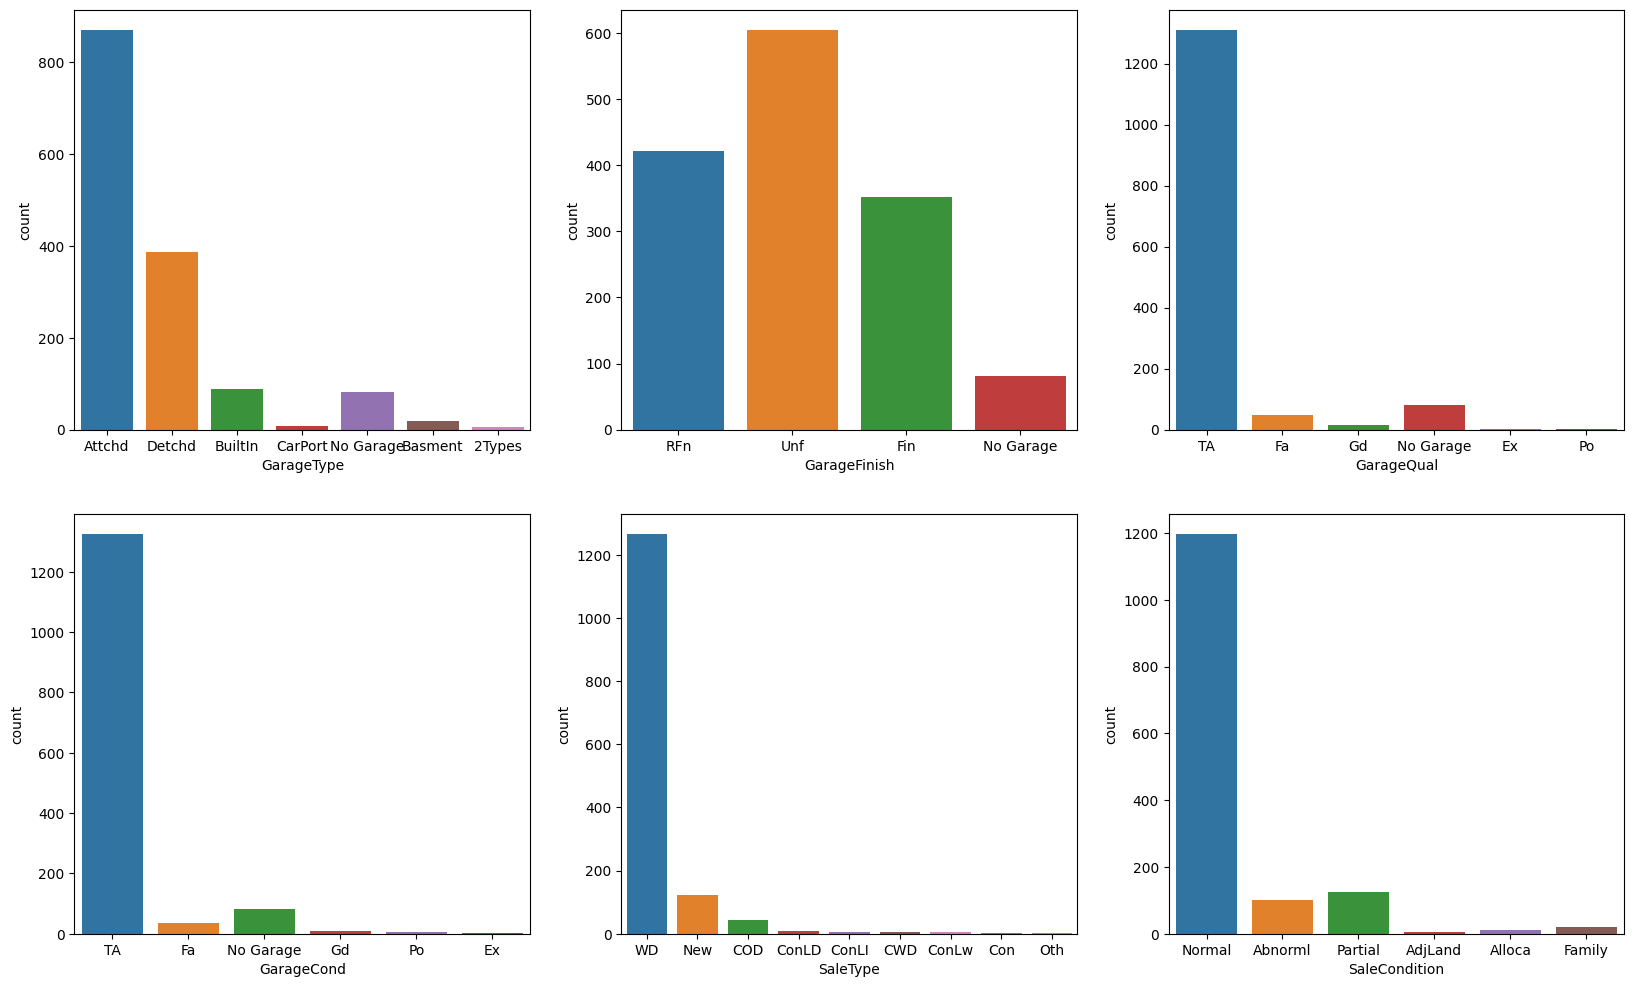

In [28]:


plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = data)
plt.show()

In [29]:
data['SaleCondition'].value_counts() #similarly checking other columns for skewness

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

- We can see that in this group except GarageType and Garage Finsih almost all are skewed so we can drop these columns.


In [30]:
data['GarageType'] = data['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
data['SaleCondition'] = data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')



data.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)


<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

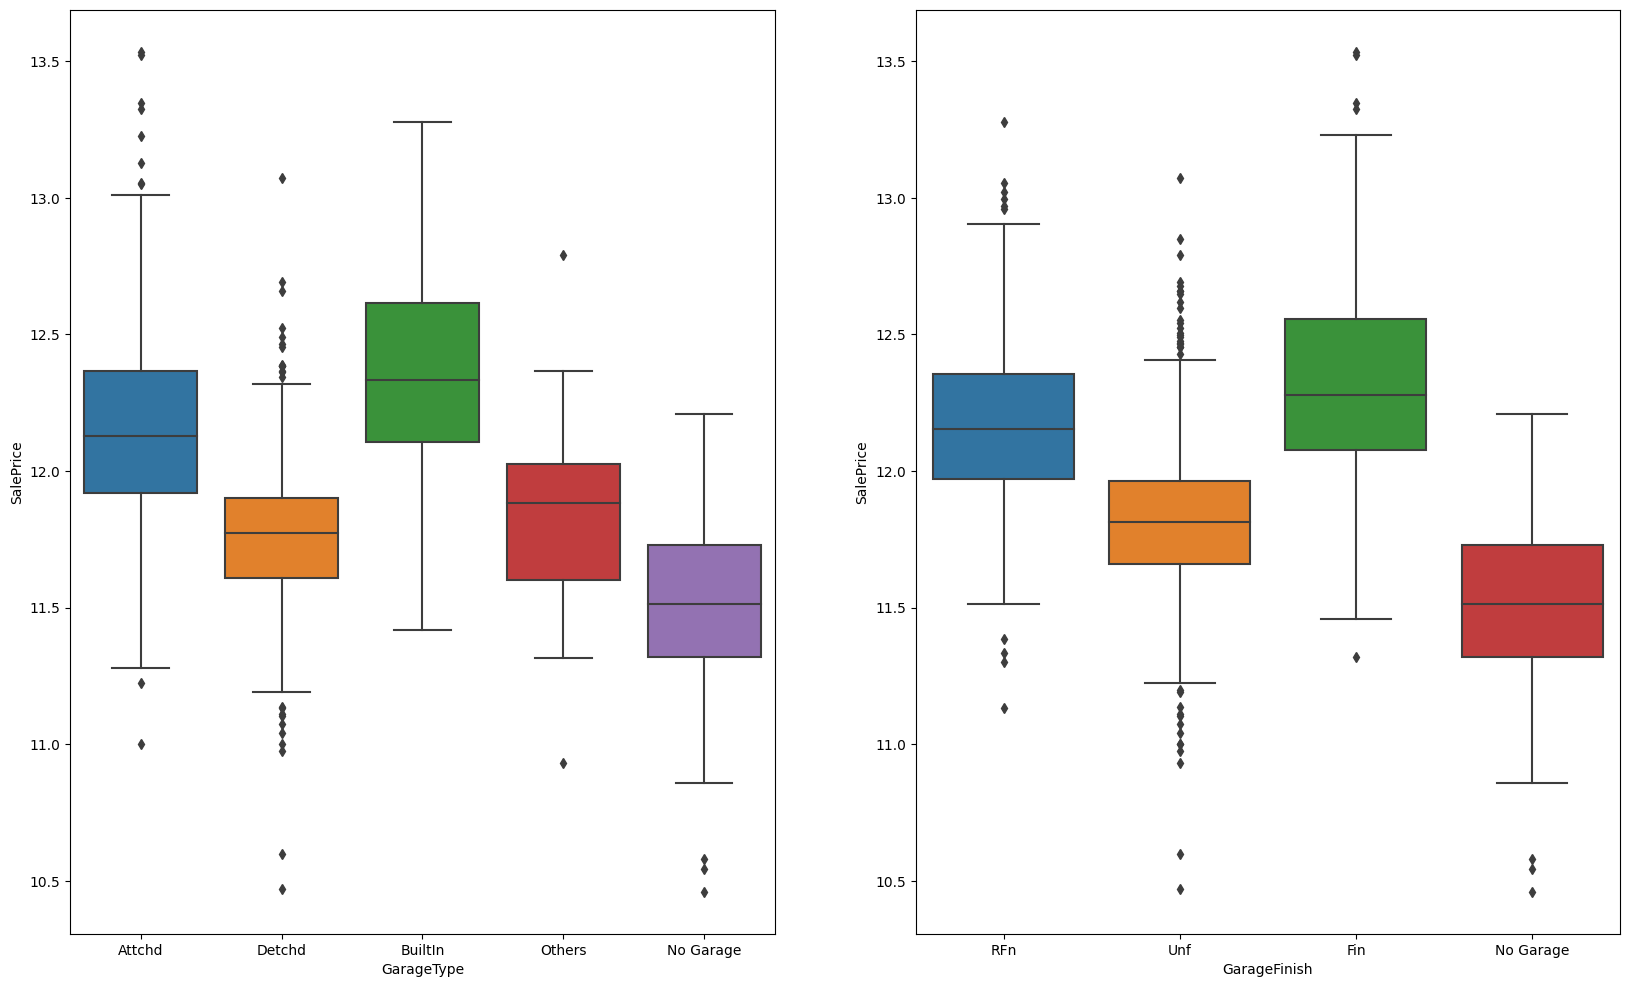

In [31]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = data)


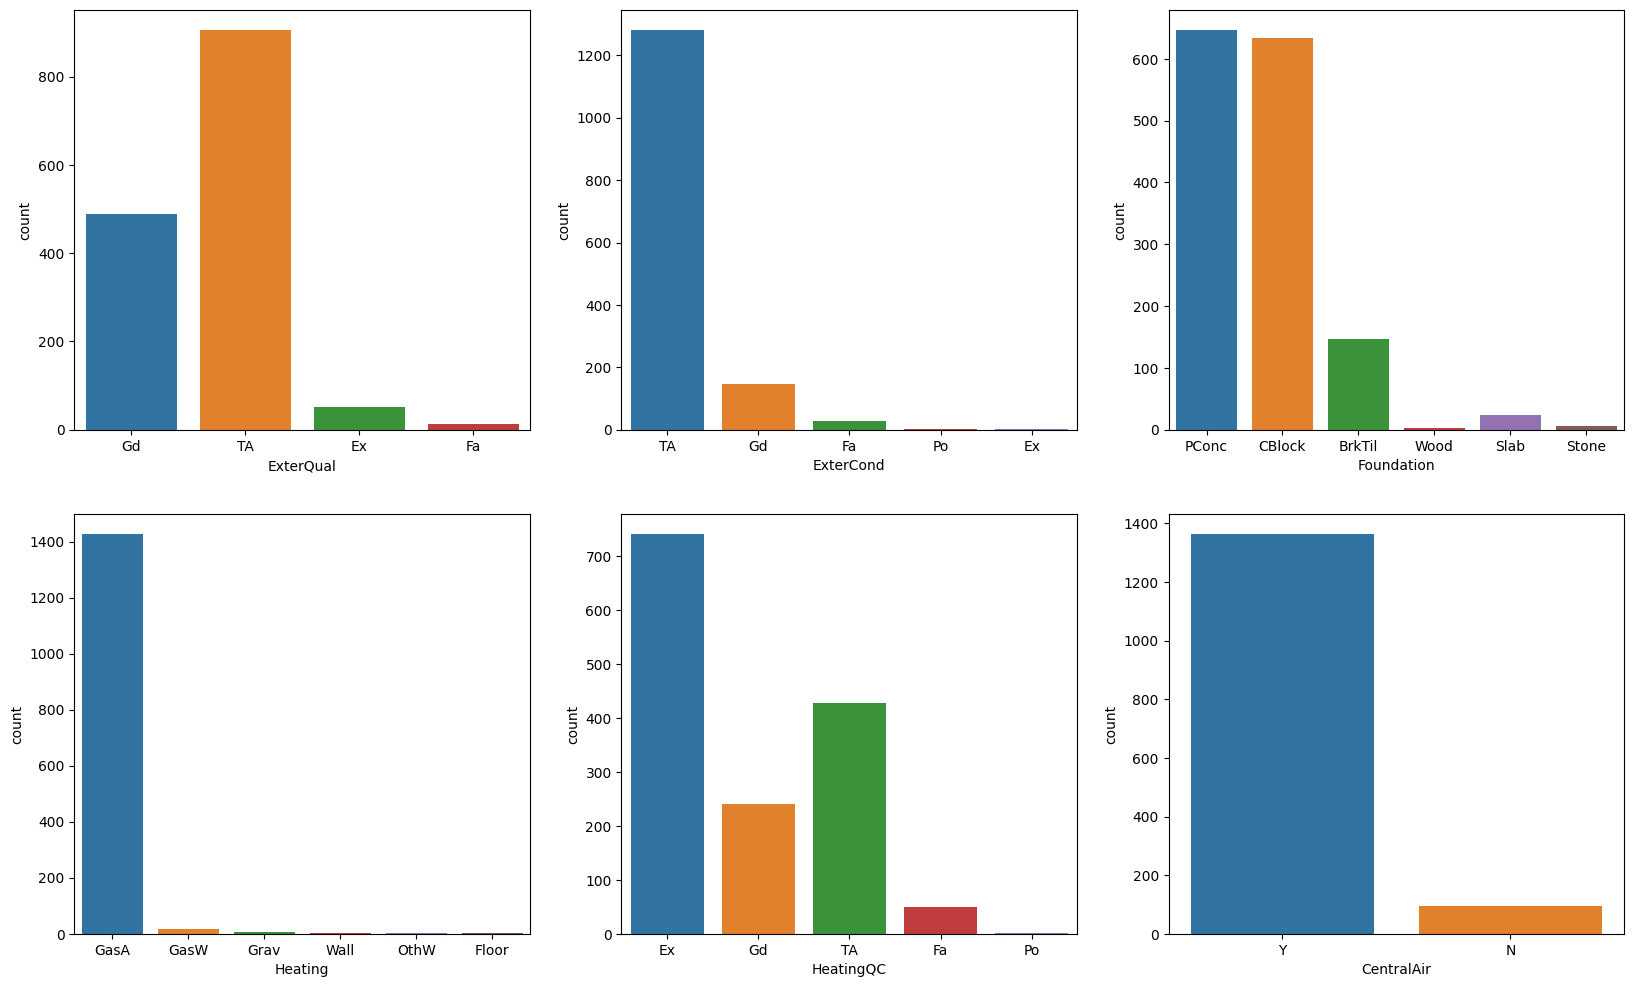

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = data)
plt.show()

In [33]:
data['HeatingQC'].value_counts() 

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [34]:
data['Foundation'] = data['Foundation'].replace(['Slab','Stone','Wood'],'Others')




data.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)


<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

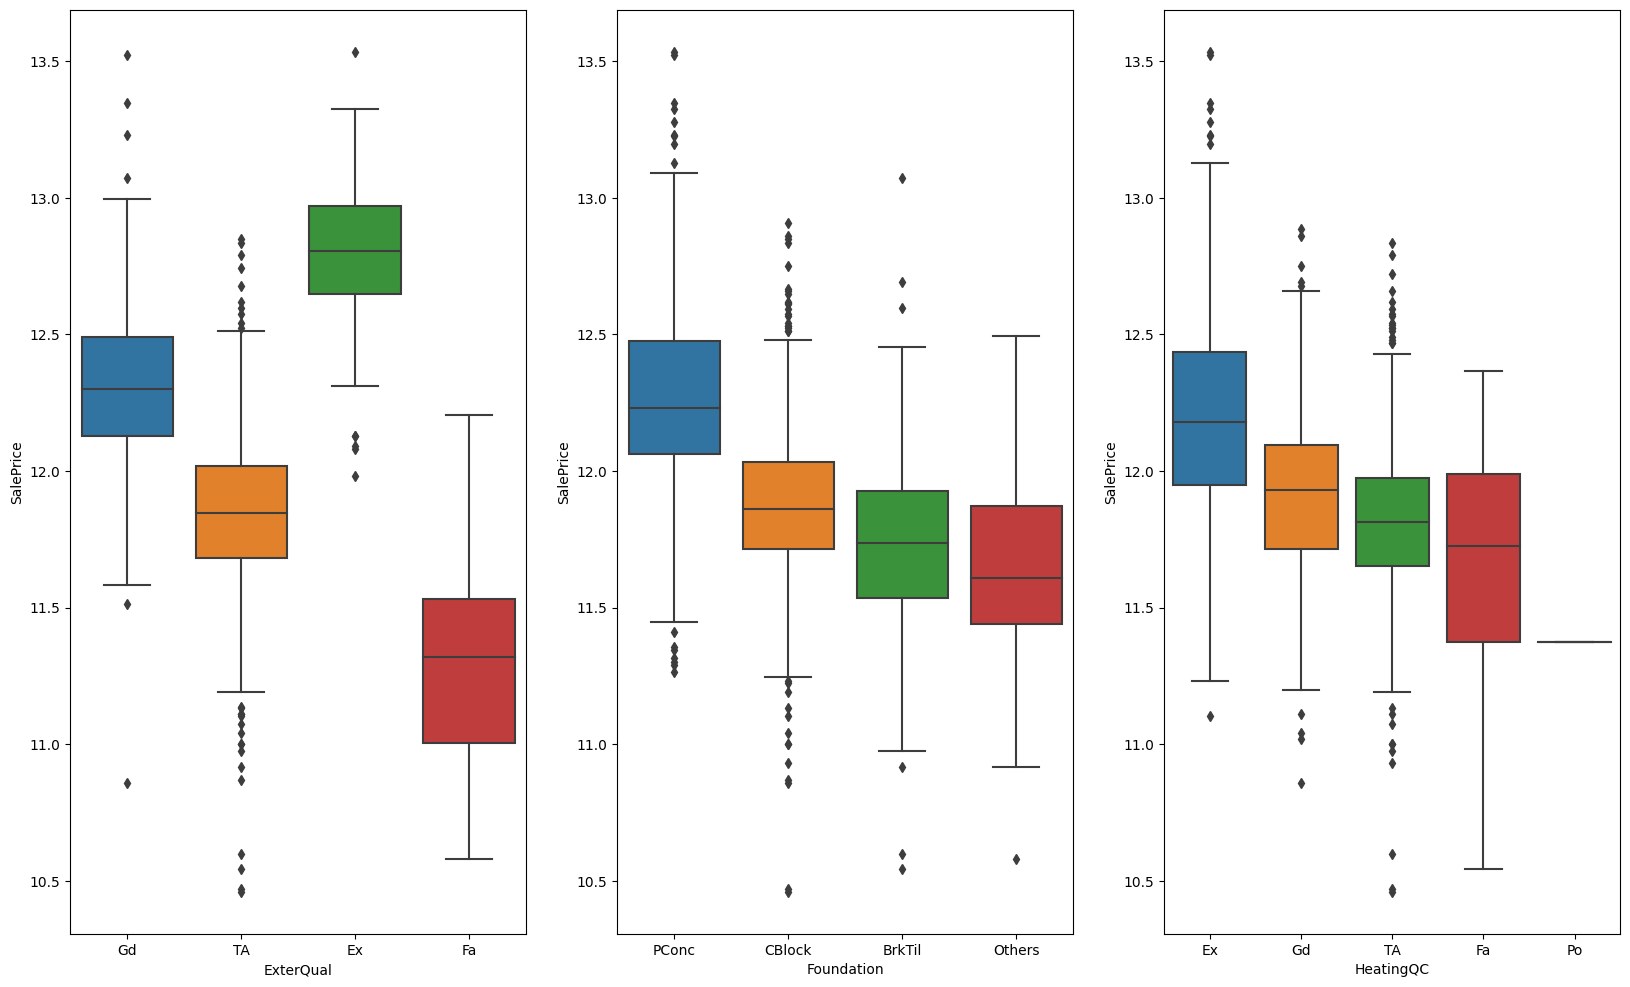

In [35]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = data)

- Price of Excellent ExterQual and HeatingQc is highest
- Price of Poured Contrete Foundation is highest.

.......................................................................................

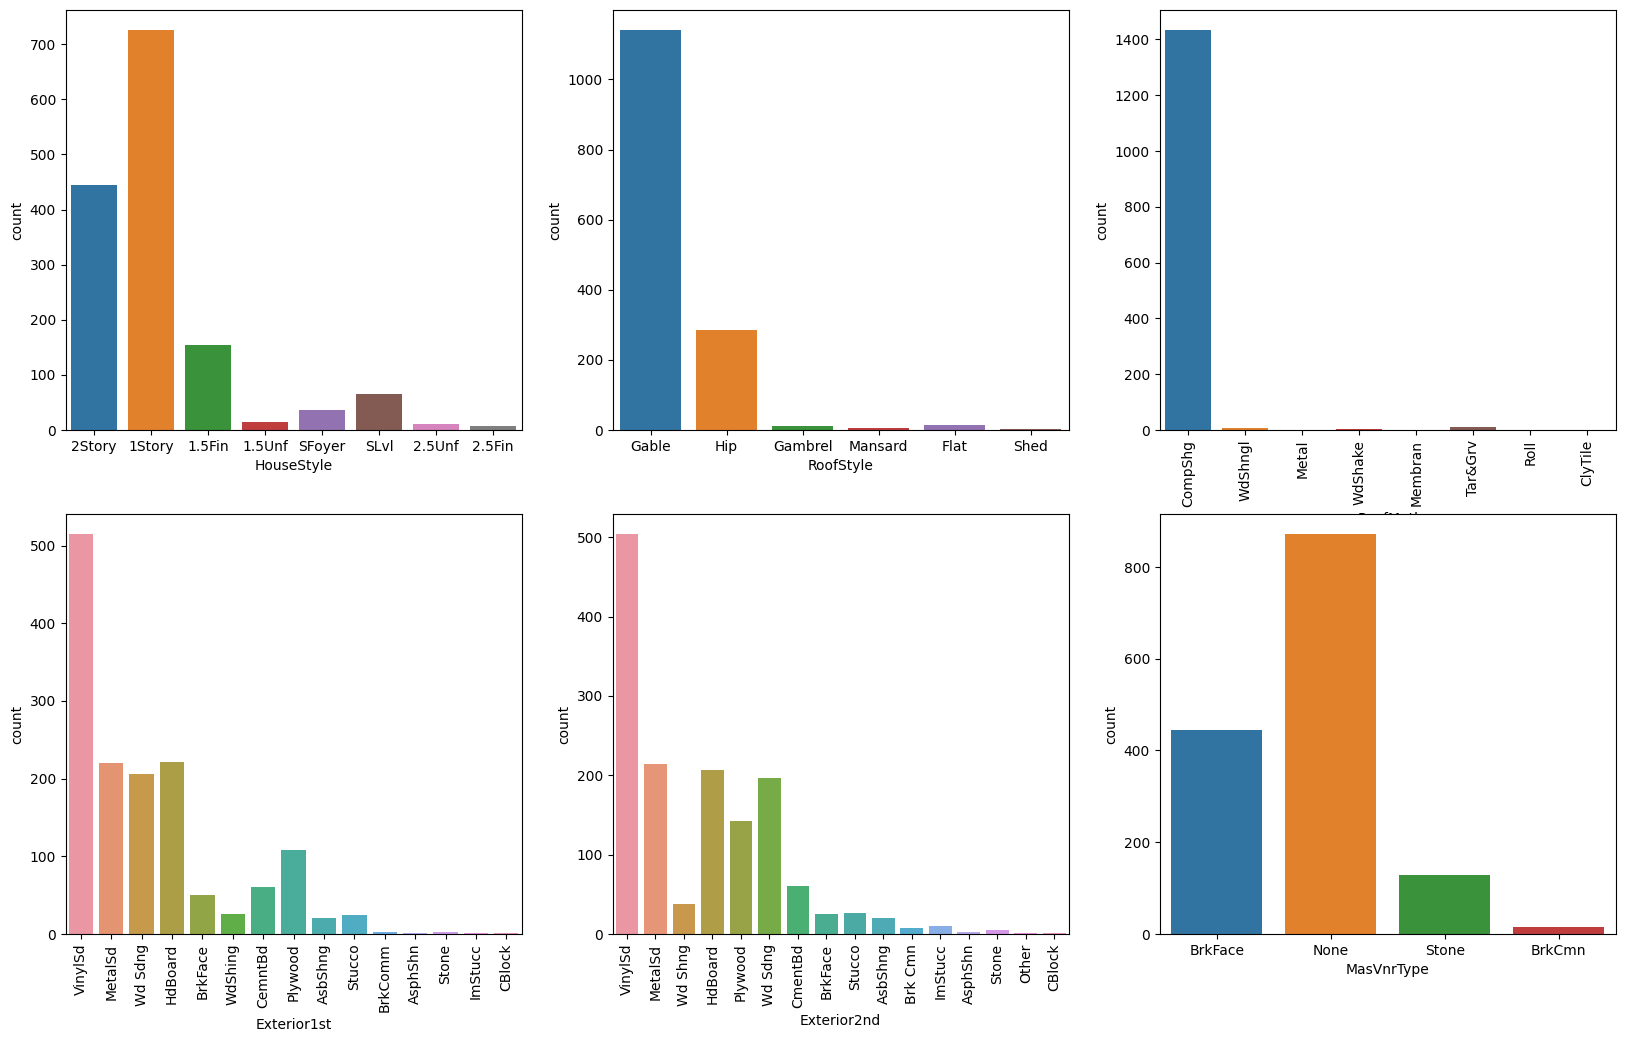

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = data)
plt.show()

In [37]:
data['Exterior2nd'].value_counts() #similarly checking the skewness for other columns

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [38]:
data['HouseStyle'] = data['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
data['RoofStyle'] = data['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
data['Exterior1st'] = data['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
data['Exterior2nd'] = data['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')


 
data.drop(['RoofMatl'],axis=1,inplace=True)

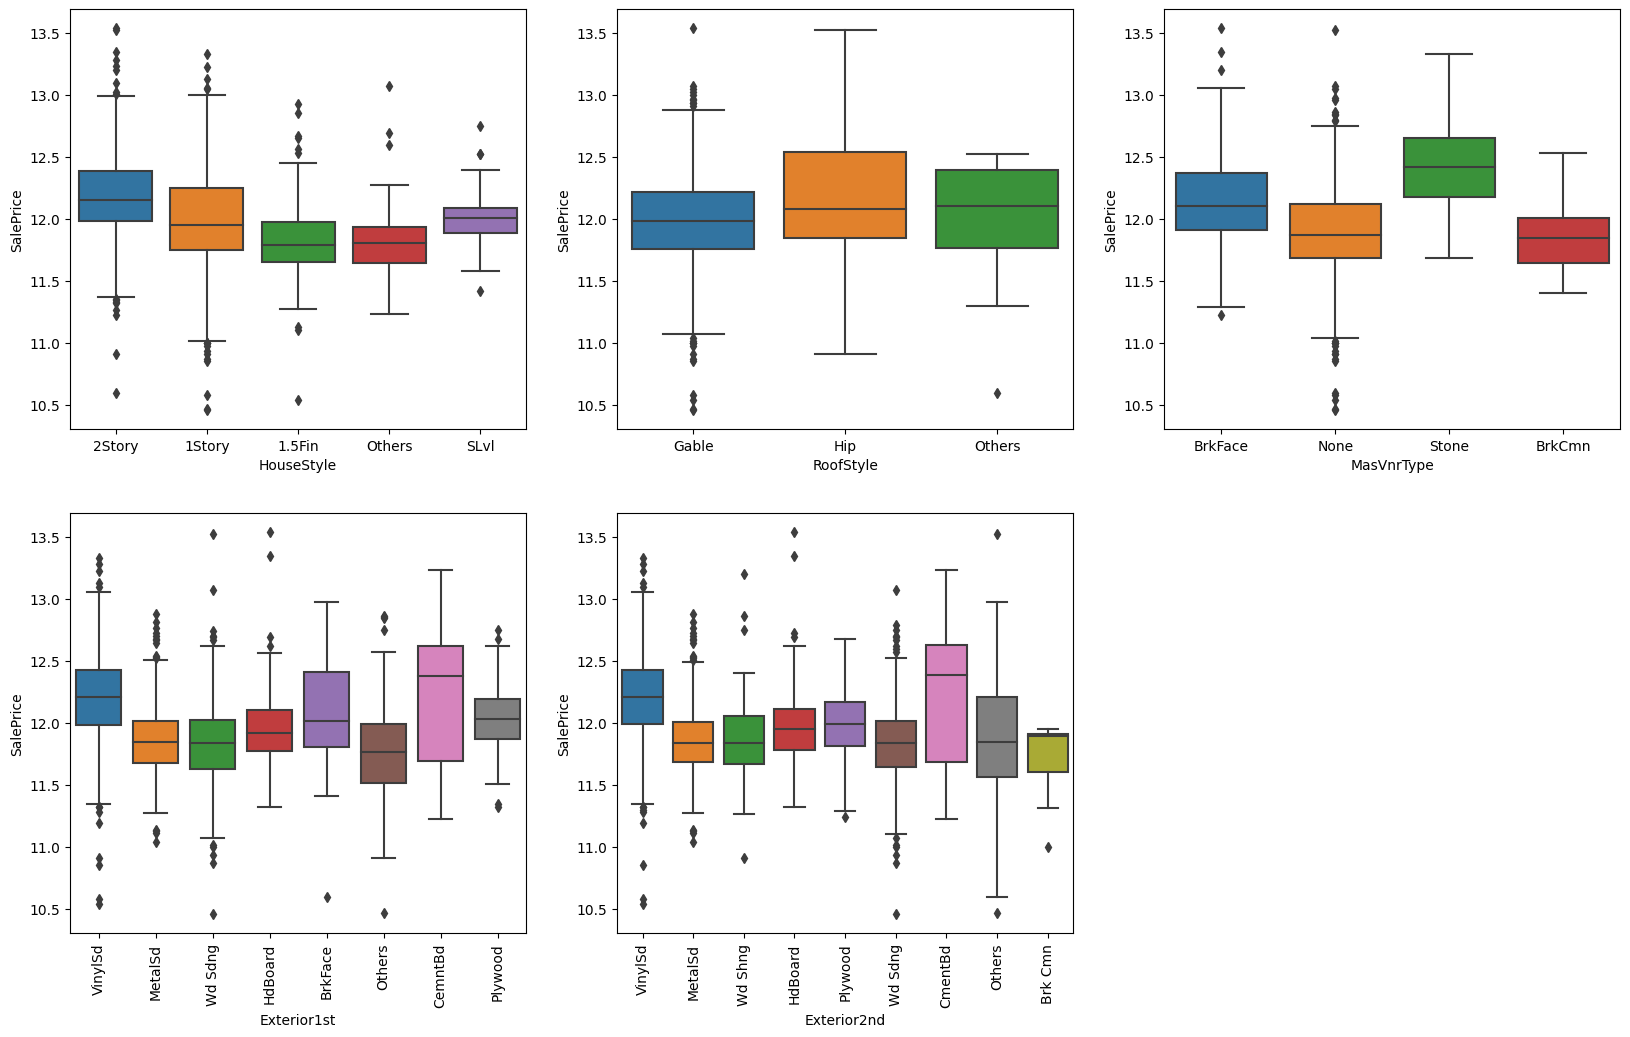

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = data)
plt.xticks(rotation=90)
plt.show()

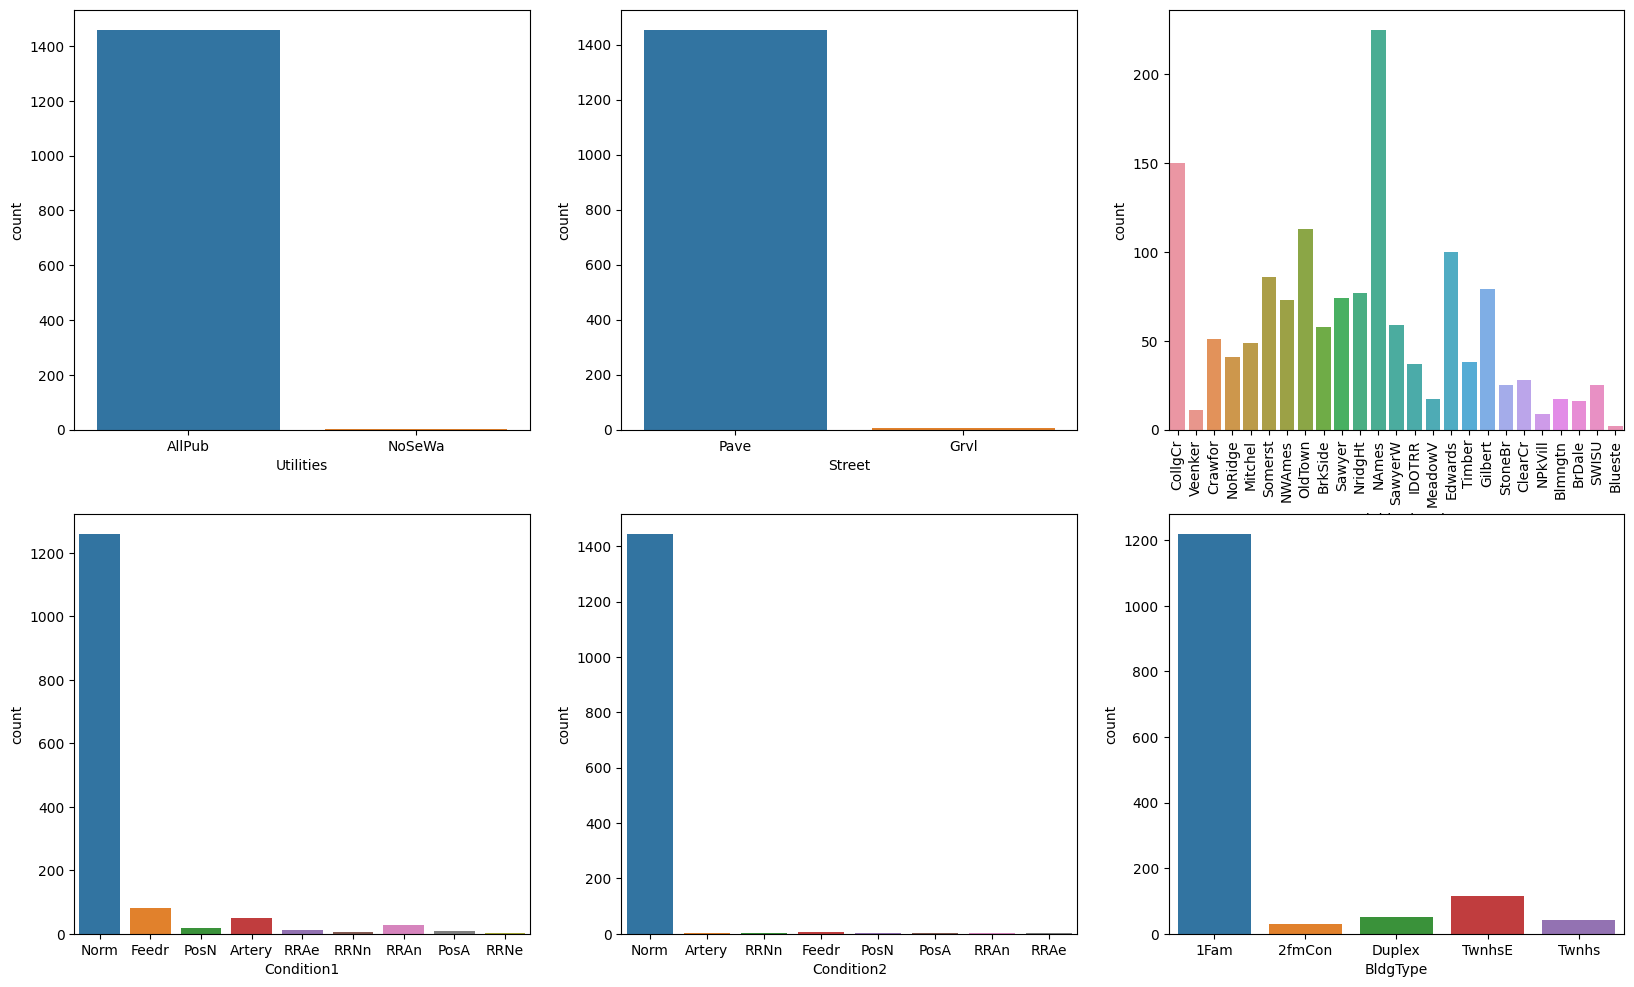

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = data)
plt.show()

In [41]:
data['BldgType'].value_counts()#similarly checking skewness for other columns

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [42]:



data.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)


<Axes: xlabel='BldgType', ylabel='SalePrice'>

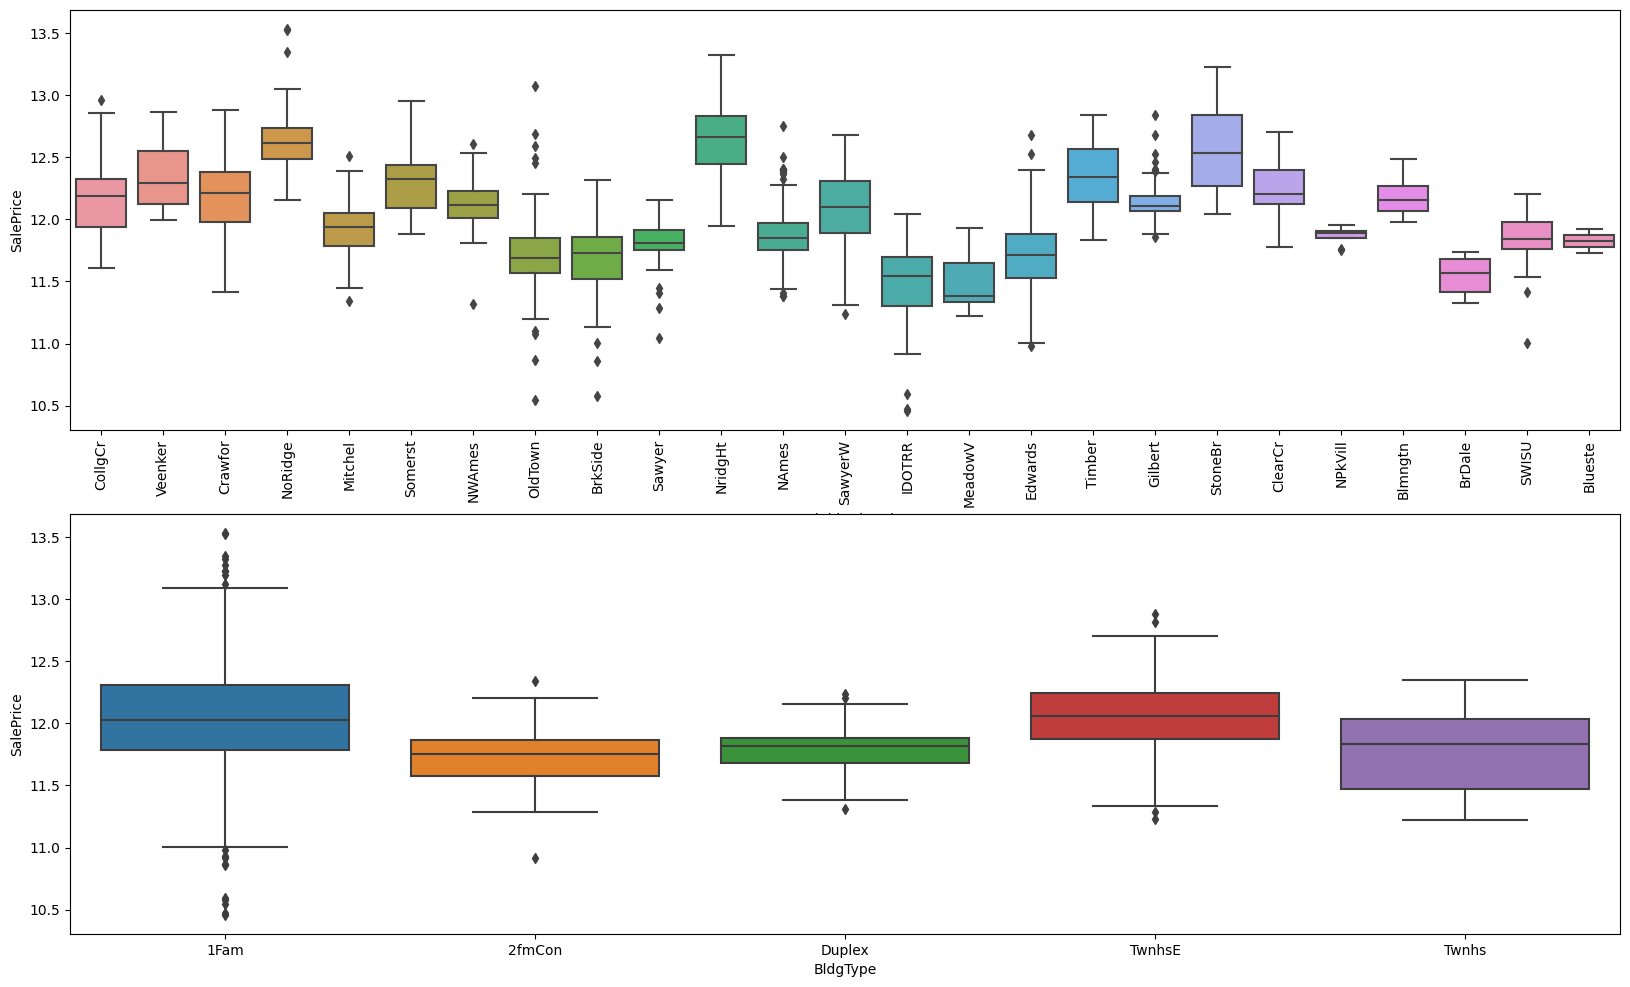

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = data)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data)


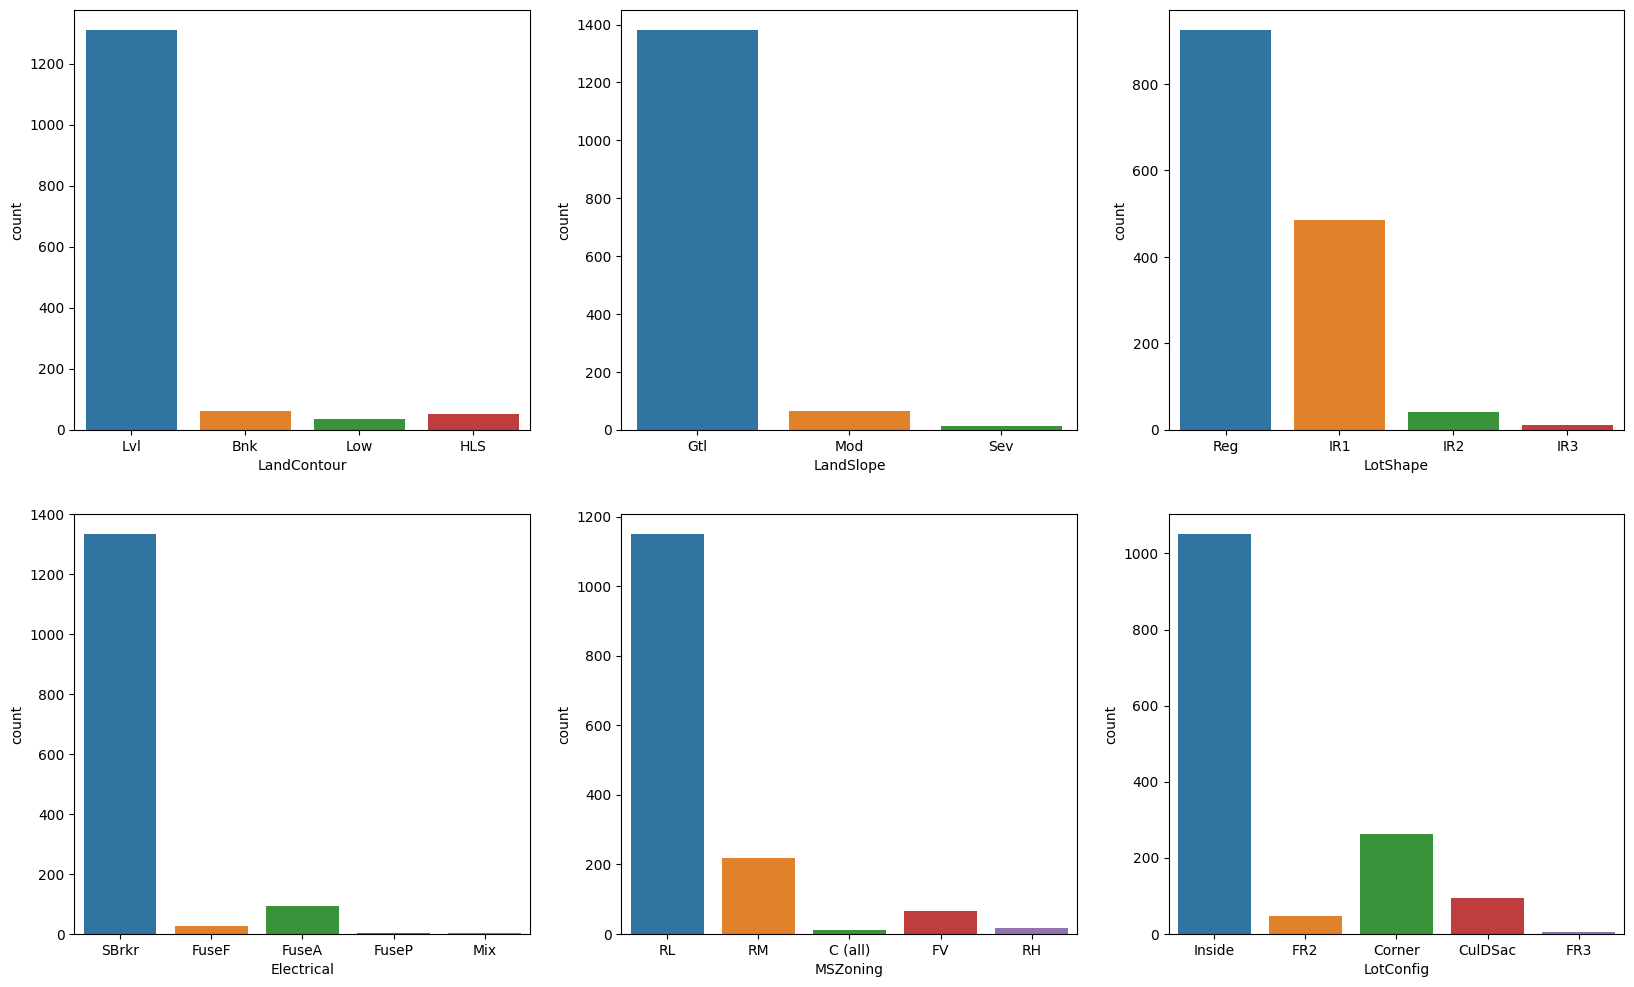

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = data)
plt.show()

In [45]:
data['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [46]:
data.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

data['MSZoning'] = data['MSZoning'].replace(['RH','C (all)'],'Others')


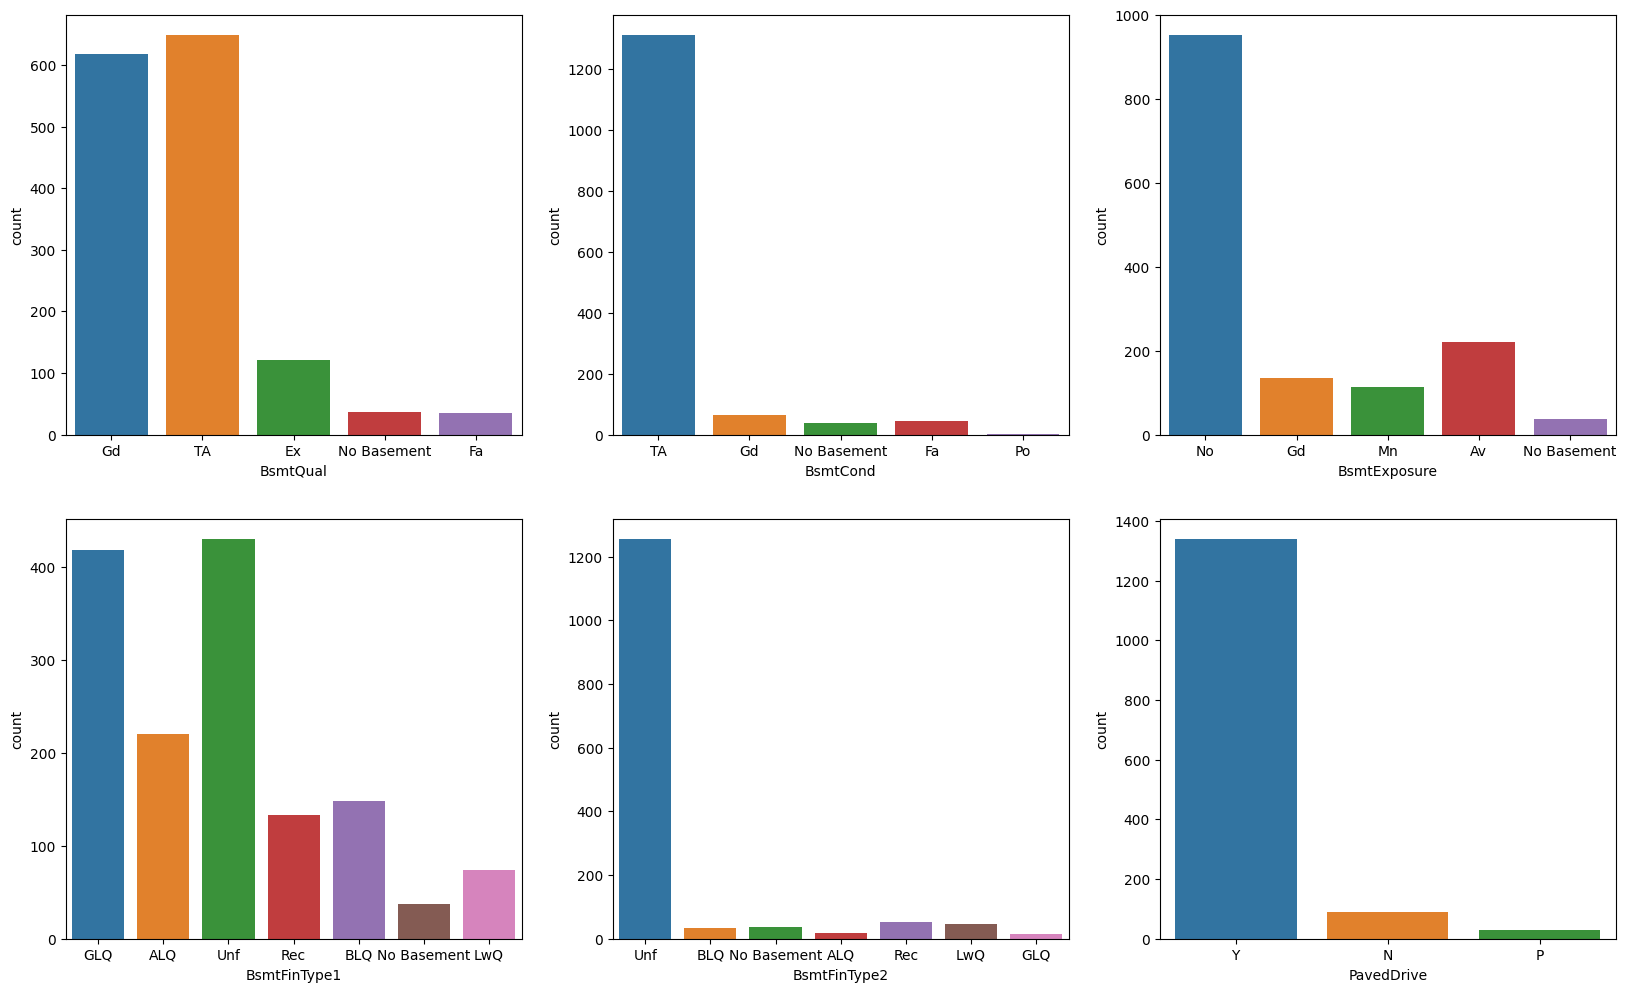

In [47]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = data)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = data)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = data)
plt.show()

In [48]:
data['BsmtCond'].value_counts() # similarly checking skewness for other columns

BsmtCond
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: count, dtype: int64

In [49]:
data.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [50]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,84,0,0,0,0,0,12,2008,Normal,12.429216


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [52]:
data['YearSinceRemodel'] = 2010 - ((data['YearRemodAdd'] - data['YearBuilt']) + data['YearBuilt']) #feature data

In [53]:
Cat1 = data.select_dtypes(include=['object']) 
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [54]:
Num = data.select_dtypes(include=['int64','float64'])
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [55]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   LotFrontage       1460 non-null   float64
 2   LotArea           1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   MasVnrArea        1460 non-null   float64
 6   BsmtFinSF1        1460 non-null   int64  
 7   BsmtFinSF2        1460 non-null   int64  
 8   BsmtUnfSF         1460 non-null   int64  
 9   TotalBsmtSF       1460 non-null   int64  
 10  1stFlrSF          1460 non-null   int64  
 11  2ndFlrSF          1460 non-null   int64  
 12  LowQualFinSF      1460 non-null   int64  
 13  GrLivArea         1460 non-null   int64  
 14  BsmtFullBath      1460 non-null   int64  
 15  BsmtHalfBath      1460 non-null   int64  
 16  FullBath          1460 non-null   int64  


In [56]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [57]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False


In [58]:

data = pd.concat([data, Cat1], axis=1) 

In [59]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,False,False,False,False,False,True,False,True,False,False
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,False,False,False,False,False,True,False,True,False,False
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,False,False,False,False,False,True,False,True,False,False
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,False,True,False,False,False,False,True,False,False,False
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,False,False,False,False,False,True,False,True,False,False


In [60]:
data.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed

In [61]:
data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,False,False,False,False,False,True,False,True,False,False


In [62]:
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model 

In [63]:
data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,False,False,False,False,False,True,False,True,False,False


In [64]:

X = data.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,False,False,False,False,False,True,False,True,False,False


In [65]:

y = data['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [66]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [67]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,False,False,True,False,True,False,False,True,False,False
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,False,False,False,False,False,True,False,True,False,False
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,False,True,False,False,False,False,True,True,False,False
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,False,False,False,False,False,False,True,True,False,False
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,False,True,False,False,False,False,True,True,False,False


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation
- Ridge and Lasso Regression

### Ridge


In [69]:

params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()


folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019984,0.015924,0.005997,0.001040,0.00004,{'alpha': 4e-05},0.868246,0.777081,0.838201,0.890474,...,0.853287,0.042834,5,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
1,0.011916,0.000701,0.005061,0.000624,0.0001,{'alpha': 0.0001},0.868247,0.777081,0.838201,0.890476,...,0.853288,0.042836,4,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
2,0.010642,0.001124,0.005559,0.000306,0.001,{'alpha': 0.001},0.868258,0.777072,0.838200,0.890516,...,0.853309,0.042858,3,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
3,0.011492,0.001575,0.005744,0.000847,0.01,{'alpha': 0.01},0.868367,0.776981,0.838188,0.890866,...,0.853502,0.043071,2,0.924368,0.935766,0.931026,0.919953,0.918902,0.926003,0.006484
4,0.010393,0.000880,0.005296,0.000660,0.1,{'alpha': 0.1},0.869382,0.776055,0.838034,0.892791,...,0.854768,0.044649,1,0.924329,0.935711,0.930967,0.919904,0.918744,0.925931,0.006505


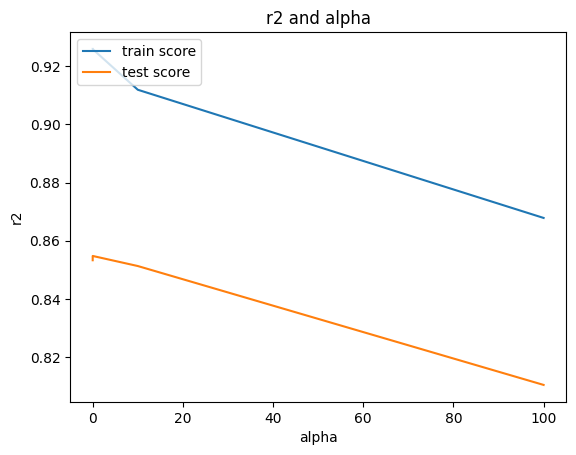

In [71]:

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:


alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.74809780e-04,  1.59466646e-06,  6.17112057e-06,  3.73538856e-06,
        1.15081461e-05,  1.82053079e-05,  3.34488343e-05,  7.92009099e-05,
        1.09011752e-04, -7.70408566e-05,  1.11171801e-04,  4.25420135e-02,
        1.51319614e-02,  5.09516505e-02,  3.69272171e-02,  9.07794039e-03,
       -8.12648652e-02,  8.30696546e-03,  3.96097675e-02,  5.34751466e-02,
        3.43279188e-05,  9.90267283e-05, -5.47707192e-05,  1.22380757e-04,
        1.94886076e-04,  2.27453067e-04, -4.04142867e-04, -3.68907754e-06,
        5.21312292e-04, -1.59513446e-03,  1.22746032e-02, -8.43053932e-02,
        4.98263439e-02,  5.96932189e-03,  1.37128949e-04, -1.20780328e-02,
        2.35023365e-02,  2.51877006e-02, -1.48351396e-05, -4.06689958e-02,
        1.48370219e-02, -2.89980792e-02,  2.13765700e-02,  9.23512984e-03,
       -7.75969900e-02,  1.25978119e-02, -2.93034632e-02,  2.18691748e-02,
       -4.94699235e-02,  7.41424037e-03,  3.66405387e-02, -3.24003086e-02,
       -1.39715714e-02, -

In [73]:
ridge.score(X_train,y_train)

0.9092068605070026

In [74]:
ridge.score(X_test,y_test)

0.8744204967072811

In [75]:

model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.541),
 ('LotFrontage', -0.143),
 ('LotArea', -0.091),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.084),
 ('BsmtFinSF2', -0.082),
 ('BsmtUnfSF', -0.081),
 ('TotalBsmtSF', -0.078),
 ('1stFlrSF', -0.069),
 ('2ndFlrSF', -0.066),
 ('LowQualFinSF', -0.066),
 ('GrLivArea', -0.064),
 ('BsmtFullBath', -0.062),
 ('BsmtHalfBath', -0.06),
 ('FullBath', -0.055),
 ('HalfBath', -0.054),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.052),
 ('TotRmsAbvGrd', -0.052),
 ('Fireplaces', -0.052),
 ('GarageCars', -0.051),
 ('GarageArea', -0.051),
 ('WoodDeckSF', -0.051),
 ('OpenPorchSF', -0.05),
 ('EnclosedPorch', -0.049),
 ('3SsnPorch', -0.048),
 ('ScreenPorch', -0.048),
 ('PoolArea', -0.046),
 ('MiscVal', -0.042),
 ('MoSold', -0.041),
 ('YearSinceRemodel', -0.033),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.032),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.032),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.032),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

## Lasso

In [76]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()


model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/nithin/anaconda3/envs/AdvancedRegressionAssignment/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.420e-01, tolerance: 1.304e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nithin/anaconda3/envs/AdvancedRegressionAssignment/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e-01, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nithin/anaconda3/envs/AdvancedRegressionAssignment/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120691,0.036552,0.005430,0.000775,0.00006,{'alpha': 6e-05},0.872325,0.773018,0.839580,0.895919,...,0.856191,0.046822,1,0.923862,0.935108,0.930417,0.919443,0.917980,0.925362,0.006517
1,0.028984,0.003973,0.005619,0.000211,0.0006,{'alpha': 0.0006},0.884401,0.724748,0.835348,0.898012,...,0.850393,0.067713,2,0.911534,0.923960,0.918723,0.907989,0.903086,0.913058,0.007462
2,0.030149,0.004153,0.004836,0.000816,0.0008,{'alpha': 0.0008},0.883902,0.709901,0.832624,0.895453,...,0.845629,0.072409,3,0.906265,0.920044,0.913821,0.903300,0.897012,0.908088,0.008059
3,0.027264,0.005421,0.005306,0.000696,0.001,{'alpha': 0.001},0.883078,0.699448,0.827873,0.892849,...,0.841339,0.075588,4,0.901000,0.916719,0.909043,0.898351,0.892075,0.903438,0.008588
4,0.019439,0.000974,0.004918,0.000957,0.002,{'alpha': 0.002},0.877497,0.652922,0.806379,0.884122,...,0.821178,0.089143,5,0.881651,0.901967,0.888512,0.880169,0.871710,0.884802,0.010111


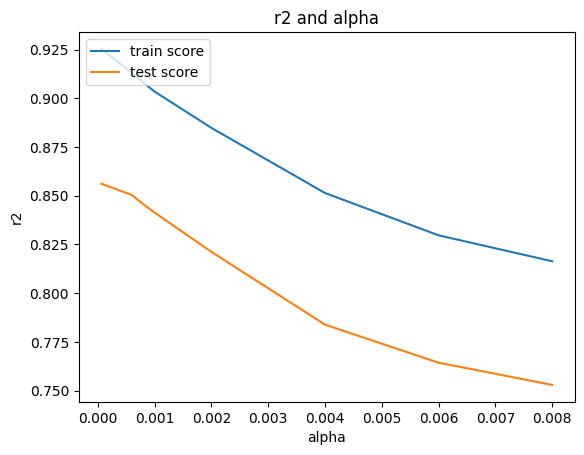

In [78]:

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:


alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [80]:
lasso.coef_

array([-4.09356126e-04,  1.41043514e-06,  1.80666838e-05,  4.75861642e-05,
        4.91108947e-05,  5.55828023e-05,  3.22848128e-05,  1.72776225e-04,
        1.95176491e-04, -2.93129965e-05,  2.33960625e-05,  4.05631982e-02,
        8.97338843e-04,  4.46795488e-02,  3.11477938e-02,  1.36517476e-03,
       -9.96565920e-02,  9.16320797e-03,  4.00955714e-02,  6.11563721e-02,
        3.68096081e-05,  1.11663349e-04, -4.88469932e-05,  1.16324360e-04,
        1.94148996e-04,  2.48687005e-04, -4.72011474e-04, -3.65282465e-06,
        4.33777426e-04, -2.04610388e-03,  0.00000000e+00, -1.01268932e-01,
        3.91866781e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.15042585e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.80791267e-02,  7.18055960e-03, -3.22277887e-02,  0.00000000e+00,
       -3.77577996e-03,  0.00000000e+00,  3.38538223e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [81]:
lasso.score(X_train,y_train)

0.898288939025357

In [82]:
lasso.score(X_test,y_test)

0.864657533144189

In [83]:

model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.482),
 ('LotFrontage', -0.21),
 ('LotArea', -0.101),
 ('MasVnrArea', -0.1),
 ('BsmtFinSF1', -0.086),
 ('BsmtFinSF2', -0.083),
 ('BsmtUnfSF', -0.078),
 ('TotalBsmtSF', -0.066),
 ('1stFlrSF', -0.057),
 ('2ndFlrSF', -0.055),
 ('LowQualFinSF', -0.053),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.042),
 ('BsmtHalfBath', -0.039),
 ('FullBath', -0.037),
 ('HalfBath', -0.035),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.032),
 ('TotRmsAbvGrd', -0.032),
 ('Fireplaces', -0.03),
 ('GarageCars', -0.029),
 ('GarageArea', -0.025),
 ('WoodDeckSF', -0.024),
 ('OpenPorchSF', -0.022),
 ('EnclosedPorch', -0.018),
 ('3SsnPorch', -0.018),
 ('ScreenPorch', -0.017),
 ('PoolArea', -0.017),
 ('MiscVal', -0.017),
 ('MoSold', -0.017),
 ('YearSinceRemodel', -0.016),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.01),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

## Conclusion :

- Ridge and Lasso regression gave decent score.
- Ridge :
        Train :91.0    Test :87.4
- Lasso :
        Train :89.9    Test :86.7

### Top 5 significant variables in Ridge:

- ('SaleCondition_Partial', 0.143)
- ('SaleCondition_Others', 0.105)
- ('SaleCondition_Normal', 0.099)
- ('GarageFinish_Unf', 0.094)
- ('GarageFinish_RFn', 0.092)

### Top 5 significant variables in Lasso:

- ('SaleCondition_Partial', 0.198)
- ('SaleCondition_Others', 0.12)
- ('SaleCondition_Normal', 0.098)
- ('GarageFinish_Unf', 0.084)
- ('GarageFinish_RFn', 0.079)


- Optimal Value of lamda for ridge : 10
- Optimal Value of lamda for Lasso : 0.001

 



 